This is an example of how to run the clairvoya in a notebook. Copy the notebook or segments as required but keep this as a pure example.

# The data

The data we are using are sampled from two guassian distributions and consist of positive, negative and unlabelled examples. Unlabelled contains a combination of data from both distributions.

In [1]:
import os.path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble

sys.path.append("../../")  # trick to import clairvoya from internal notebook directory
import clairvoya.runbench
import clairvoya.pulearning
import clairvoya.voya_plotter

%matplotlib inline

data_file_name = '../data/test_Gaussians_formatted.csv'

In [2]:
df = pd.read_csv(data_file_name)
df=df[:2000] # temp speed boost
df.head()

,Unnamed: 0,label,x,y,x**2,y**2
0,0,-1,0.138901,1.067257,0.019294,1.139038
1,1,0,1.356910,2.212229,1.841205,4.893957
2,2,1,0.322084,0.172259,0.103738,0.029673
3,3,0,-0.017633,0.071693,0.000311,0.005140
4,4,0,0.738554,2.255003,0.545462,5.085037


In [3]:
df.describe()

,Unnamed: 0,label,x,y,x**2,y**2
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,999.500000,-0.006000,0.485780,0.508216,1.481532e+00,1.521639e+00
std,577.494589,0.446165,1.116321,1.124272,1.967994e+00,1.986752e+00
min,0.000000,-1.000000,-2.992034,-3.845457,8.109634e-08,1.785259e-08
25%,499.750000,0.000000,-0.275886,-0.238078,1.581061e-01,1.642681e-01
50%,999.500000,0.000000,0.490662,0.538937,7.272970e-01,7.200280e-01
75%,1499.250000,0.000000,1.277011,1.277919,2.076702e+00,2.137871e+00
max,1999.000000,1.000000,4.018727,4.172901,1.615017e+01,1.741311e+01


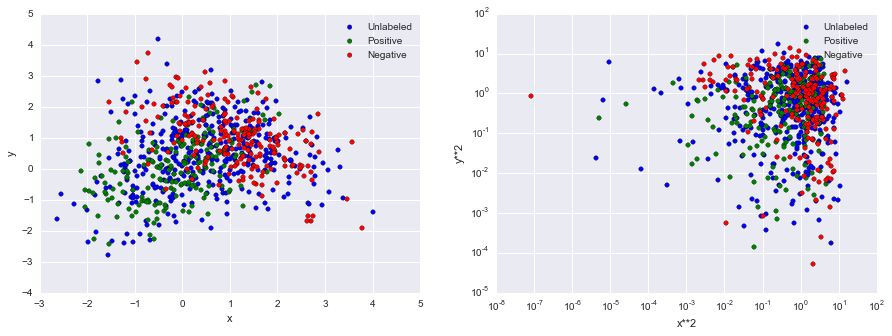

In [4]:
marker_limit = 400
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# x vs y
df[df["label"]==0][:marker_limit].plot(kind="scatter", x="x", y="y", c='blue', ax=ax1, legend=True, label="Unlabeled")
df[df["label"]==1][:marker_limit].plot(kind="scatter", x="x", y="y", c='green', ax=ax1, label="Positive")
df[df["label"]==-1][:marker_limit].plot(kind="scatter", x="x", y="y", c='red', ax=ax1, label="Negative")
# x^2 vs y^2
df[df["label"]==0][:marker_limit].plot(kind="scatter", x="x**2", y="y**2", c='blue', ax=ax2, legend=True, label="Unlabeled",
                                      logx=True, logy=True)
df[df["label"]==1][:marker_limit].plot(kind="scatter", x="x**2", y="y**2", c='green', ax=ax2, label="Positive")
df[df["label"]==-1][:marker_limit].plot(kind="scatter", x="x**2", y="y**2", c='red', ax=ax2, label="Negative")

# Configuring the benchmark

The benchmark module clairvoya requires 3 dictionarys, general config, clasifiers to use and the grid search parameters for the classifiers. First we load clairvoya and then set up the dictionarys

In [5]:
config = {
    "data_file": data_file_name,
    "out_path": None, # TODO Disable
    "num_folds": 5,
    "test_size": 0.2,
    "pu_learning": True,
    "num_cores": 3,
    "verbosity": 0
}

svc_estimator = sklearn.svm.SVC(C=2.5, kernel='linear', class_weight='auto', probability=True)

classifiers = {
    'PosOnly(E&N2008)': clairvoya.pulearning.PosOnly(svc_estimator, hold_out_ratio=0.2, ),
#     'SVM_DoubleWeight(E&N2008)': clairvoya.pulearning.SVMDoubleWeight(svc_estimator),
}

classifiers_gridparameters = { # Gridsearch off
    'PosOnly(E&N2008)': None,
#     'SVM_DoubleWeight(E&N2008)': None,
}

In [6]:
results_dict = clairvoya.runbench.run_benchmark(config, classifiers, classifiers_gridparameters)

The `results_dict` gives output of most required parameters per classifer, and can be passed to voya_plotter functions directly

In [7]:
clf_names = results_dict.keys()
print clf_names
print results_dict[clf_names[0]]['auc_score']

['PosOnly(E&N2008)']
0.88019


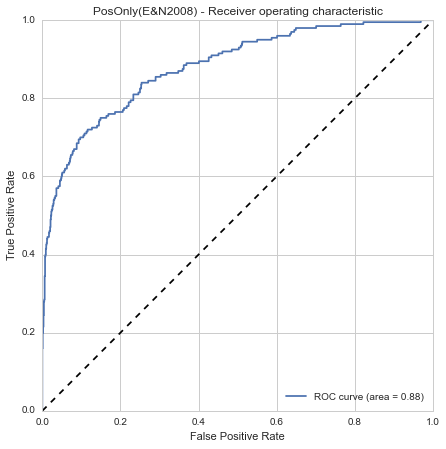

In [8]:
clairvoya.voya_plotter.roc_curve(results_dict[clf_names[0]])

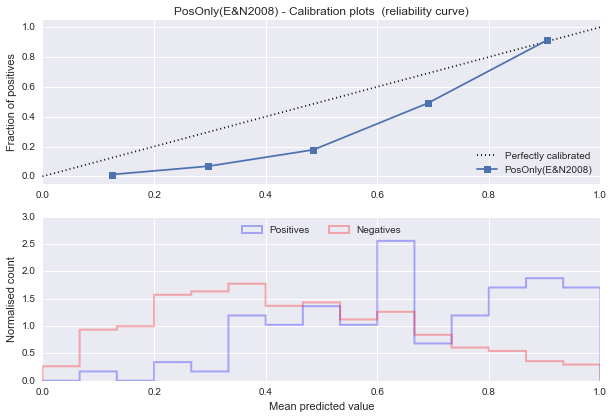

In [9]:
clairvoya.voya_plotter.reliability_curve(results_dict[clf_names[0]])